In [1]:
%pylab inline 
import pandas as pd
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
weather_2012_final = pd.read_csv('./../data/weather_2012.csv',
                                index_col='Date/Time',
                                parse_dates='Date/Time')

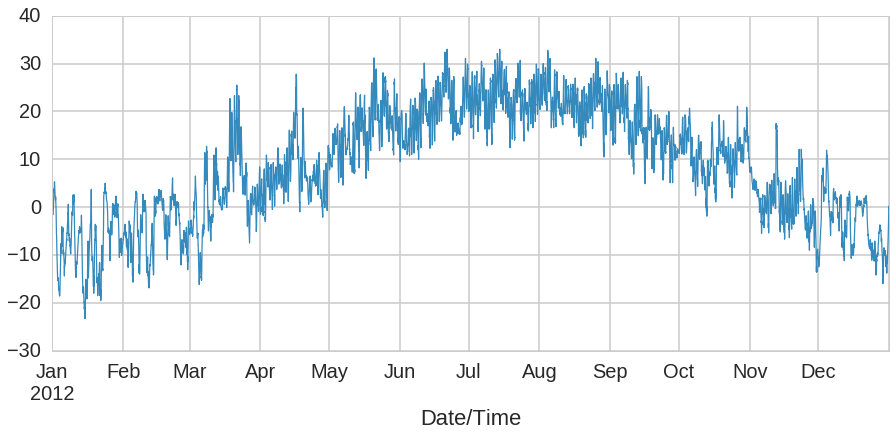

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(22, 12))
sns.set_context("poster", font_scale=1.25, rc={"lines.linewidth": 1.25,"lines.markersize":8})
weather_2012_final['Temp (C)'].plot(figsize=(15,6))

In [14]:
url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

In [24]:
url = url_template.format(**{'month':3,'year':2012})

In [27]:
!curl url | head -50

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   178    0   178    0     0    156      0 --:--:--  0:00:01 --:--:--   156
<html>
<head><title>301 Moved Permanently</title></head>
<body bgcolor="white">
<center><h1>301 Moved Permanently</h1></center>
<hr><center>nginx</center>
</body>
</html>


In [36]:
march_2012 = pd.read_csv(url,
                        skiprows=15,
                        index_col='Date/Time',
                        encoding='latin1',
                        parse_dates='Date/Time')
march_2012.head()

,Year,Month,Day,Time,Data Quality,Temp (Â°C),Temp Flag,Dew Point Temp (Â°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,NaN,-9.7,NaN,72,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,NaN,-8.7,NaN,79,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,NaN,-8.3,NaN,80,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,NaN,-7.7,NaN,79,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,NaN,-7.8,NaN,83,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow


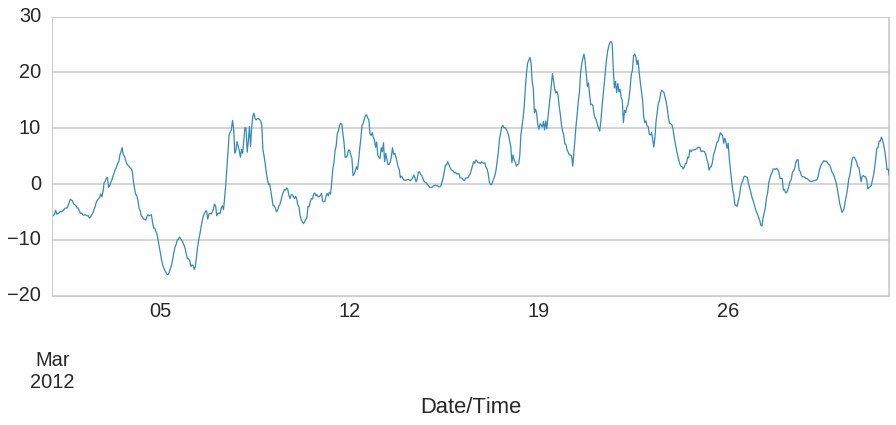

In [41]:
march_2012[u"Temp (\xc2\xb0C)"].plot(figsize=(15, 5))

In [45]:
march_2012.dropna(axis=1,how='any',inplace=True)
march_2012.head()

,Year,Month,Day,Time,Data Quality,Temp (Â°C),Dew Point Temp (Â°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,-7.8,83,35,1.6,100.62,Snow


In [48]:
march_2012.drop(['Year','Month','Day','Time','Data Quality'],axis=1,inplace=True)

# Plot the temperature by hour

In [51]:
march_2012.loc[:,'Hour'] = march_2012.index.hour

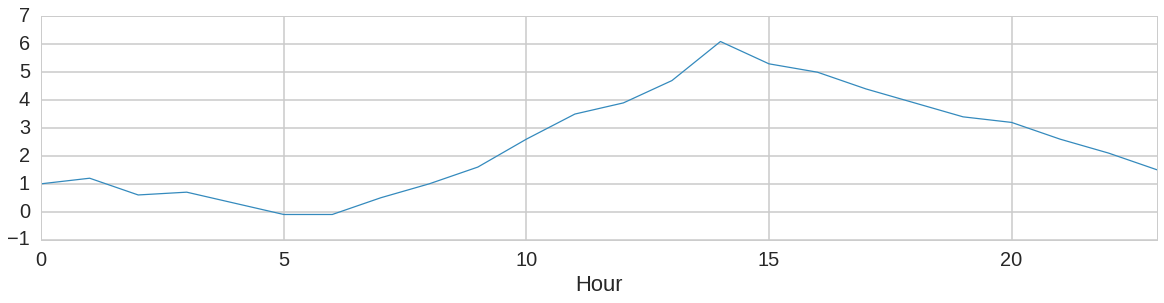

In [58]:
march_2012.groupby('Hour')[u"Temp (\xc2\xb0C)"].agg(np.median).plot(figsize=(20,4))

In [73]:
def get_weather_year_month(year,month):
    """
    Download the weather in someplace in Canada for
    a given month in a year. 
    
    Input
    -----
    (year,month): int 
       year and month for requested data
    Output
    ------
    df_weather_year_month: DataFrame
       DataFrame for weather data. 
    """
    url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
    if month == 1:
        year+= 1
    url = url_template.format(**{'month':month,'year':year})
    march_2012 = pd.read_csv(url,
                        skiprows=15,
                        index_col='Date/Time',
                        encoding='latin1',
                        parse_dates='Date/Time')
    
    march_2012.dropna(axis=1,how='any',inplace=True)
    march_2012.columns = [col.replace(u'\xb0', '') for col in march_2012.columns]
    march_2012.columns = [col.replace(u'\xc2', '') for col in march_2012.columns]
    march_2012.drop(['Year','Month','Day','Time','Data Quality'],axis=1,inplace=True)
    return march_2012

In [74]:
ls_data = [get_weather_year_month(2012,month) for month in range(1,13)]

In [75]:
df_data=pd.concat(ls_data)

In [76]:
df_data.to_csv('./../data/weather_2012.csv')

# Find the months that have the most snow

In [82]:
is_snow=df_data.Weather.map(lambda x: True if 'Snow' in x else False)

In [85]:
is_snow=df_data.Weather.str.contains('Snow')

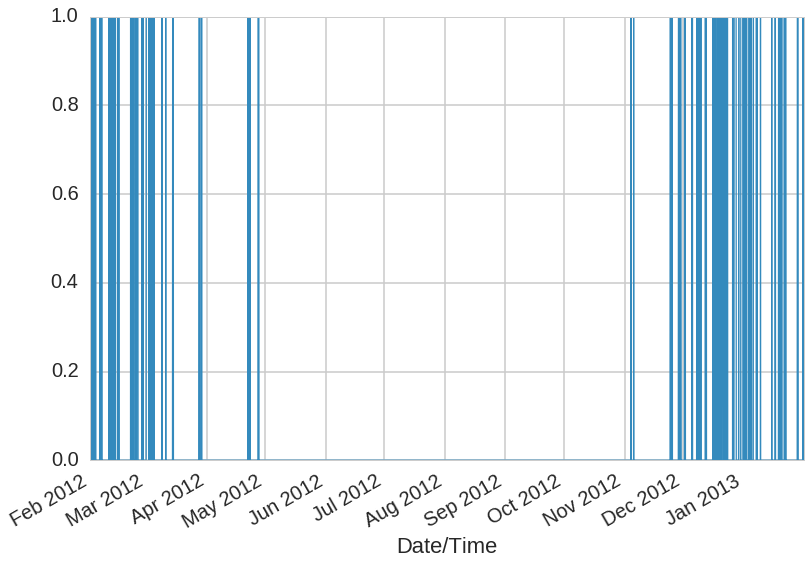

In [86]:
is_snow.plot()

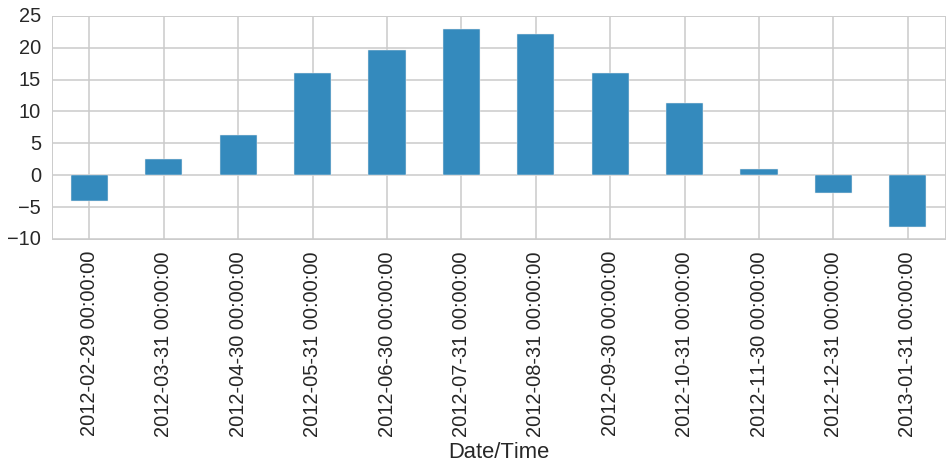

In [94]:
df_data.resample('M').apply(np.median)['Temp (C)'].plot(kind='bar',figsize=(16,4))

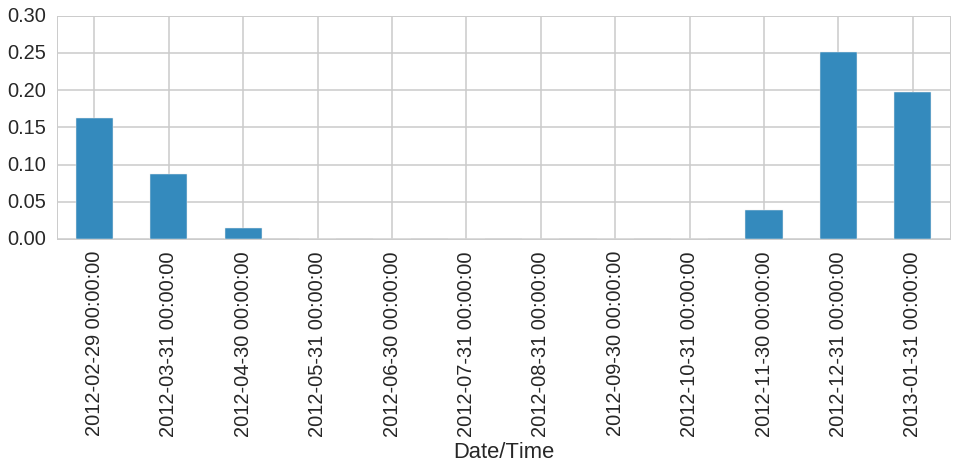

In [97]:
is_snow.astype(float).resample('M').apply(np.mean).plot(kind='bar',figsize=(16,4))

In [98]:
temperature = df_data.resample('M').apply(np.median)['Temp (C)']
snow=is_snow.astype(float).resample('M').apply(np.mean)

temperature.name='temperature'
snow.name='snow'

In [100]:
df=pd.concat((temperature,snow),axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd09eaca9d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fd09e821e50>], dtype=object)

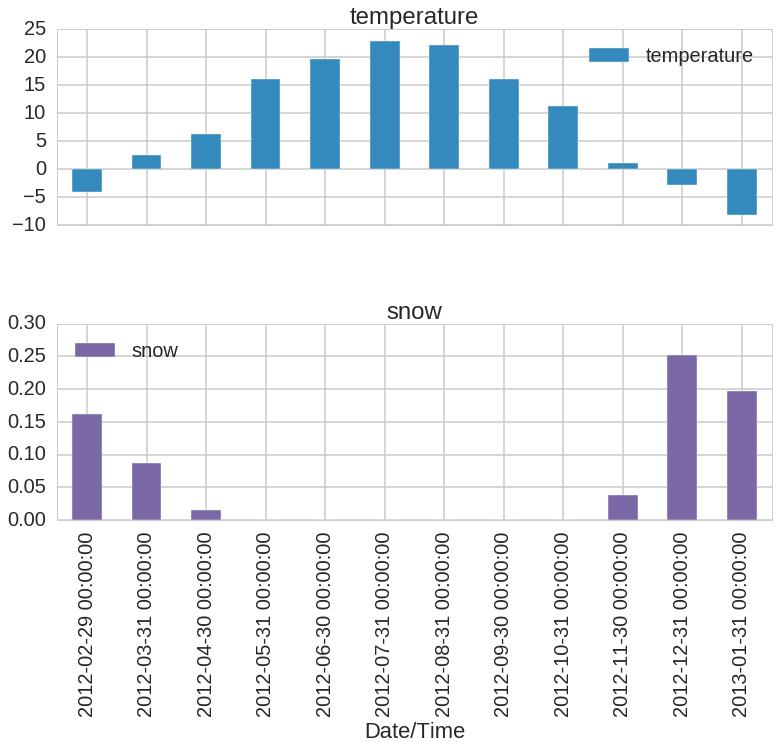

In [103]:
df.plot(kind='bar',subplots=True)